In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers.experimental import RMSprop
from keras.layers import Dropout, Flatten, Dense 

In [2]:
train =  ImageDataGenerator(rescale= 1/252)
validation =  ImageDataGenerator(rescale= 1/252)

In [24]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Train",image_size=(img_height, img_width),batch_size=batch_size)

Found 382 files belonging to 4 classes.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 4 classes.


In [26]:
class_names = train_ds.class_names
class_names

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']

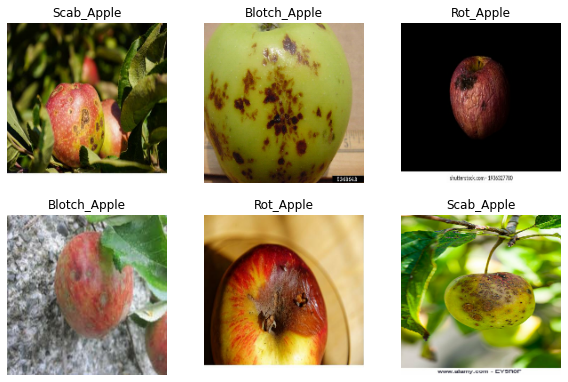

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [28]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

In [29]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 22,853,924
Trainable params: 1,051,140
Non-trainable params: 21,802,784
_________________________________________________________________


In [30]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])


In [41]:
epochs=15
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
12/12 [==============================] - 33s 3s/step - loss: 1.1404 - accuracy: 0.7958 - val_loss: 6.2282 - val_accuracy: 0.5250
Epoch 2/15
12/12 [==============================] - 34s 3s/step - loss: 1.0559 - accuracy: 0.8298 - val_loss: 4.5672 - val_accuracy: 0.5083
Epoch 3/15
12/12 [==============================] - 30s 2s/step - loss: 0.7444 - accuracy: 0.8220 - val_loss: 3.6155 - val_accuracy: 0.5583
Epoch 4/15
12/12 [==============================] - 36s 3s/step - loss: 0.5167 - accuracy: 0.8717 - val_loss: 3.4685 - val_accuracy: 0.5167
Epoch 5/15
12/12 [==============================] - 34s 3s/step - loss: 2.0899 - accuracy: 0.7330 - val_loss: 9.2147 - val_accuracy: 0.5083
Epoch 6/15
12/12 [==============================] - 29s 2s/step - loss: 2.3298 - accuracy: 0.7539 - val_loss: 6.3259 - val_accuracy: 0.4500
Epoch 7/15
12/12 [==============================] - 34s 3s/step - loss: 1.3314 - accuracy: 0.8010 - val_loss: 4.7074 - val_accuracy: 0.5250
Epoch 8/15
12/12 [==

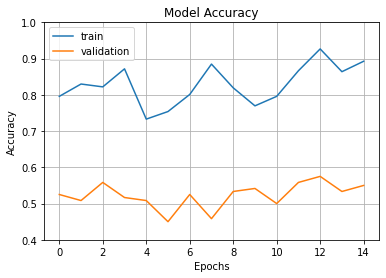

In [42]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

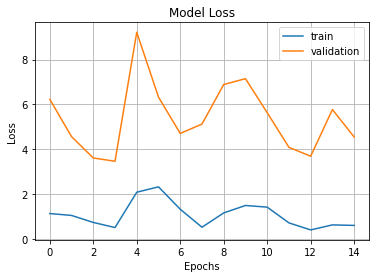

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [44]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 4 classes.


In [45]:
test_loss, test_accuracy = resnet_model.evaluate(test_ds, verbose=1)
print("Loss  : ", test_loss)
print("Accuracy  :",test_accuracy)

4/4 [==============================] - 7s 2s/step - loss: 4.5496 - accuracy: 0.5500
Loss  :  4.549637794494629
Accuracy  : 0.550000011920929


In [46]:
test_image = image.load_img(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test\Rot_Apple\2apbkfh.jpg', target_size = (180,180))
test_image = np.expand_dims(test_image, axis=0)
result = resnet_model.predict(test_image)
output_class=class_names[np.argmax(result)]
output_class

1/1 [==============================] - 0s 159ms/step


'Blotch_Apple'

In [47]:
resnet_model.save(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\InceptionV3Trained\resnet50withoutaug')

INFO:tensorflow:Assets written to: C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\InceptionV3Trained\resnet50withoutaug\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\InceptionV3Trained\resnet50withoutaug\assets


In [48]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\InceptionV3Trained\resnet50withoutaug')

In [49]:
test_image = image.load_img(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test\Rot_Apple\2apbkfh.jpg', target_size = (180,180))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
output_class=class_names[np.argmax(result)]
output_class

1/1 [==============================] - 5s 5s/step


'Blotch_Apple'